In [1]:
# JuanSebastianLunaSanchez
#Analisis de Datos
#UNAD
# Importar las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
# Cargar el dataset al entorno de trabajo

data = pd.read_csv('C:/Users/sluna/Documents/Universidad/9no Semestre/Analisis de Datos/Tarea 2/Dataset Regresión Logística/framingham.csv', sep=',')

In [3]:
# Realizar una exploración inicial de los datos

data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
# Se evidencian variables como BPMeds y glucose con datos nulos(NaN), se realiza una exploración adicional para confirmar
# que columnas tienen datos nulos y cuantos son

nulos = data.isna().sum()
print(nulos)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [5]:
# Para hacer un tratamiento a los datos sin eliminar información del dataset se reemplazaran los valores nulos
# por la media de la variable (Imputacion de valores faltantes) 

data = data.fillna(data.mean())

In [6]:
# Validamos que la imputación de datos nulos haya sido exitosa

nulos = data.isna().sum()
print(nulos)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


<Axes: >

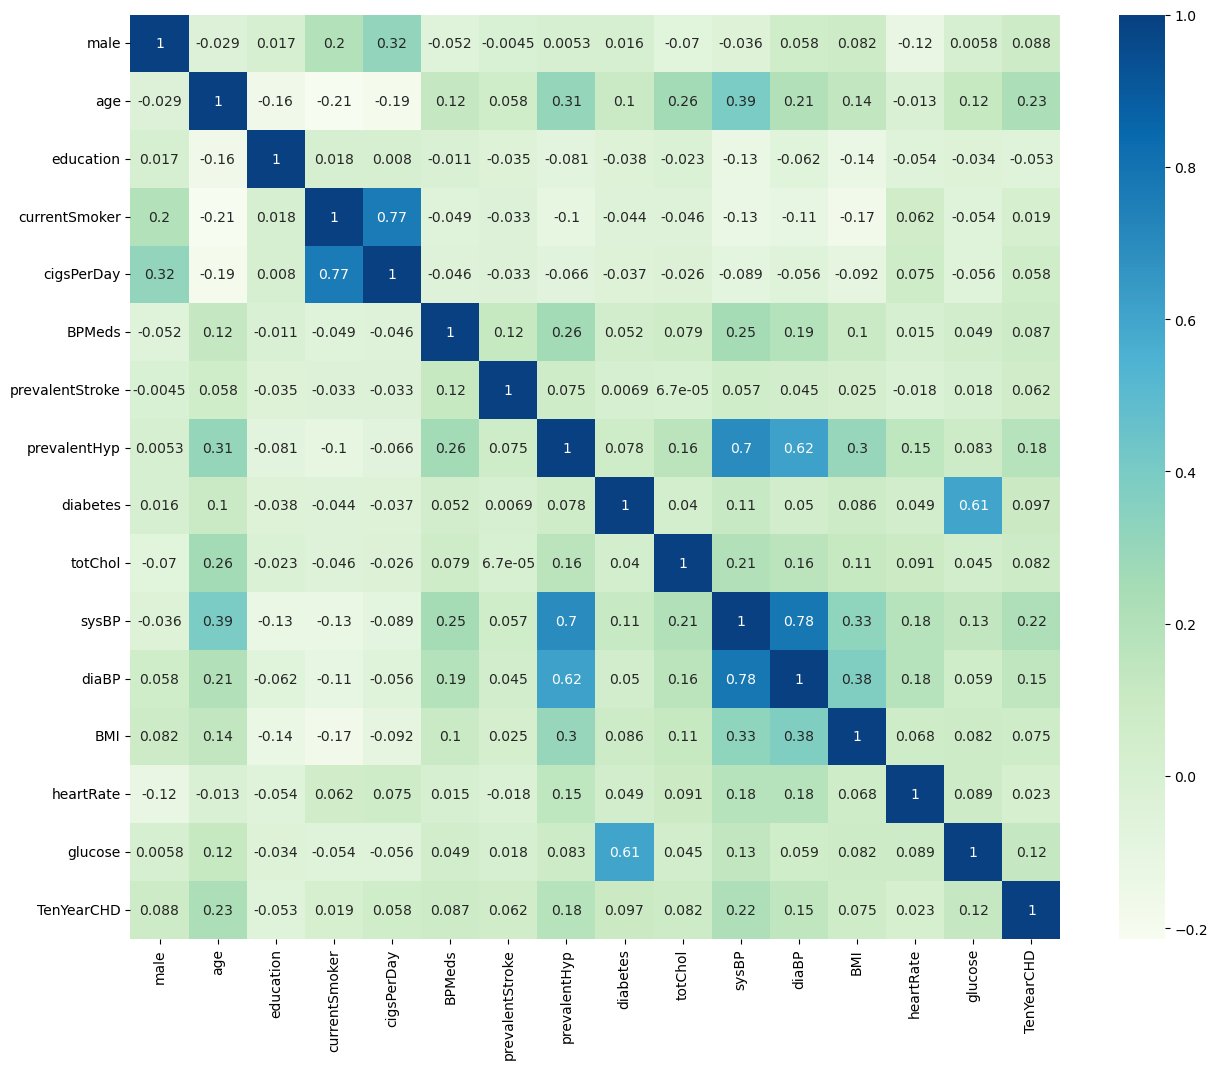

In [7]:
# Se realiza una matriz de correlación para confirmar que relación tienen las diferentes variables independientes del dataset
# con la variable objetivo,para este caso TenYearCHD (Riesgo de enfermedad coronaria en 10 años)

mcor = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(mcor, annot= True, cmap='GnBu')

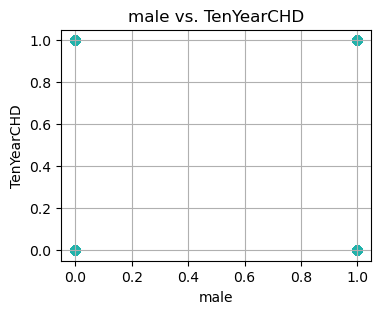

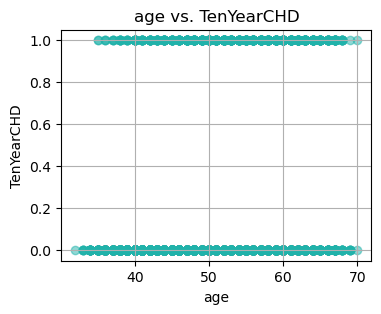

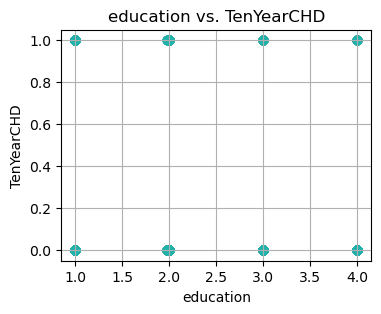

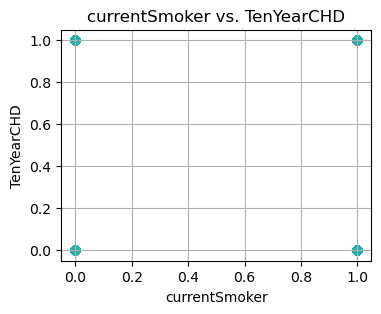

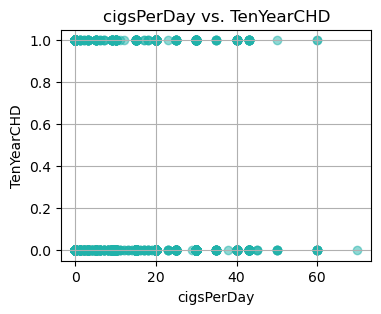

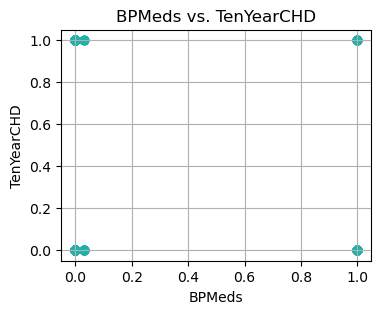

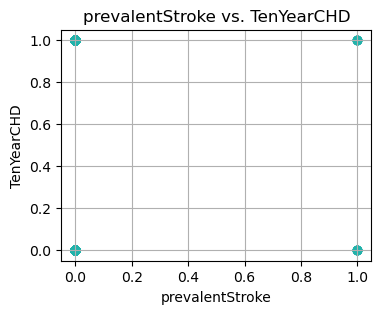

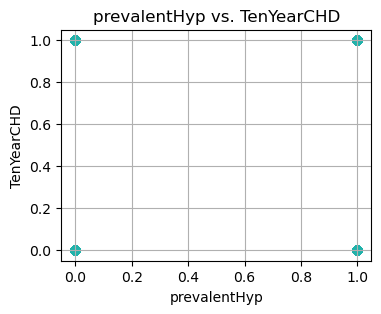

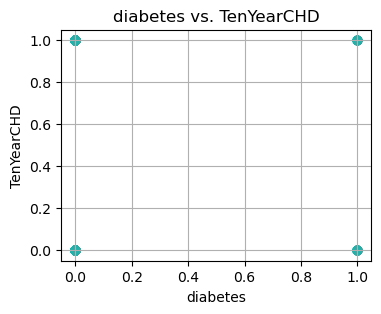

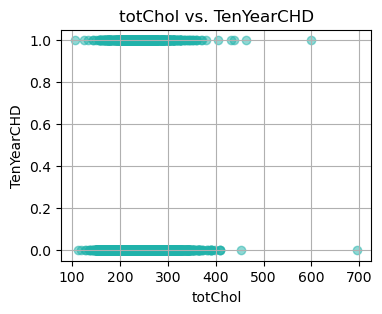

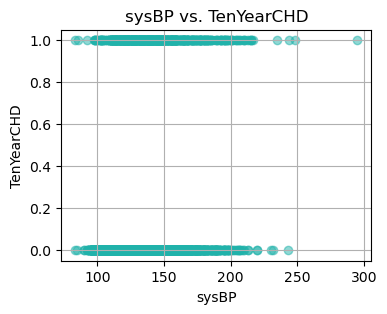

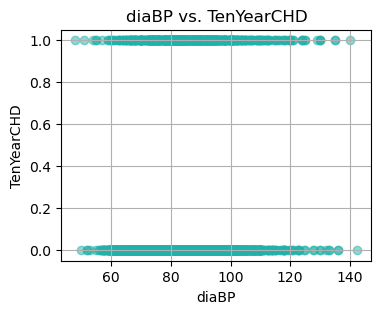

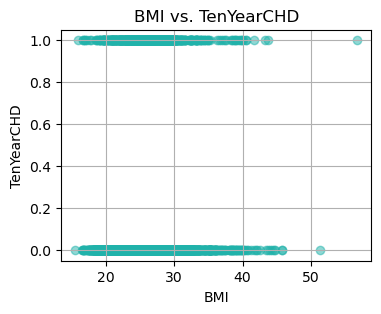

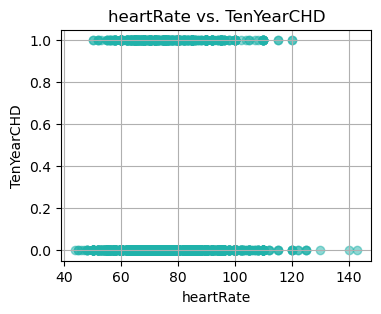

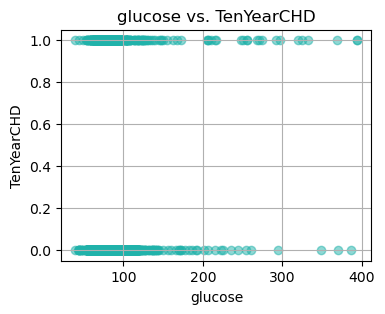

In [8]:
# Se realiza una impresión de graficos de dispersión de las variables independientes vs la variable objetivo
# para confirmar la relación entre estas

variables_independientes = data.columns.drop('TenYearCHD')

for variable in variables_independientes:
    plt.figure(figsize=(4, 3)) 
    plt.scatter(data[variable], data['TenYearCHD'], alpha=0.5, color="lightseagreen") 
    plt.xlabel(variable)  
    plt.ylabel('TenYearCHD') 
    plt.title(f'{variable} vs. TenYearCHD') 
    plt.grid(True) 
    plt.show()

In [9]:
# De acuerdo a estos resultados, de la matriz de correlación y los graficos de dispersión
# no todas las variables independientes son utiles para entrenar # el modelo de regresión logistica
# se realiza un nuevo dataset dejando unicamente las variables de utilidad

variables_utiles = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

data_finales = data[variables_utiles].copy()

data_finales.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
## Modelo de Regresión Logistica 
## Definir los parametros de x e y de acuerdo con las variables del nuevo dataset

x = data_finales.drop('TenYearCHD',axis=1)
y = data_finales['TenYearCHD']

In [11]:
# Separar el conjunto de datos en train y test (70% - 30%) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y, random_state= 0)

In [12]:
# Realizar y validar el escalado de variables (normalización de datos) para permitir la comparación
# sobre los mismos rangos de valores

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-0.99761577,  0.50347739,  0.68260604, ...,  0.18743196,
         0.67385837, -0.89424528],
       [ 0.86422369, -0.7555742 , -1.89278063, ...,  1.27590309,
        -1.07722554,  0.28923062],
       [ 1.09695363, -0.7555742 , -0.25389821, ...,  0.63707128,
        -1.49415029,  0.28923062],
       ...,
       [-0.41579094, -0.7555742 , -0.09000996, ..., -1.62586756,
        -1.32738039,  0.0051964 ],
       [-0.76488583, -0.7555742 ,  0.12070349, ...,  1.52406468,
        -1.07722554,  0.05253544],
       [-1.2303457 , -0.7555742 , -0.20707299, ...,  0.22674469,
         1.5910928 , -1.03626239]])

In [13]:
## Enternar el modelo de regresión logistica

rlog = LogisticRegression(random_state = 0)
rlog.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [14]:
## Realizar y validar la predicción de datos con el modelo entrenado
prediccion = rlog.predict (x_test)
prediccion

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
# Evaluar el modelo entrenado a traves de la construcción de la matriz de regresión del modelo

m_conf = confusion_matrix (y_test, prediccion)
m_conf

array([[1068,   11],
       [ 181,   12]], dtype=int64)

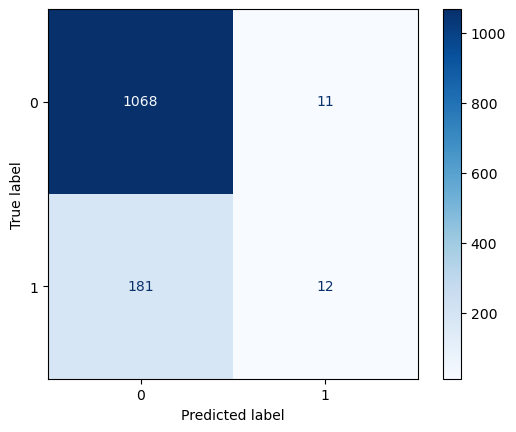

In [16]:
#Imprimir la matriz de confusión

disp = ConfusionMatrixDisplay(m_conf)
disp.plot(cmap='Blues', values_format='d', colorbar=True)
plt.show()

In [17]:
# Calcular y mostrar las métricas de evaluación del modelo entrenado
accuracy = accuracy_score(y_test, prediccion)
precision = precision_score(y_test, prediccion)
recall = recall_score(y_test, prediccion)
f1 = f1_score(y_test, prediccion)

print(f'Exactitud: {accuracy * 100:.2f}%')
print(f'Precisión: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-Score: {f1 * 100:.2f}%')

Exactitud: 84.91%
Precisión: 52.17%
Recall: 6.22%
F1-Score: 11.11%


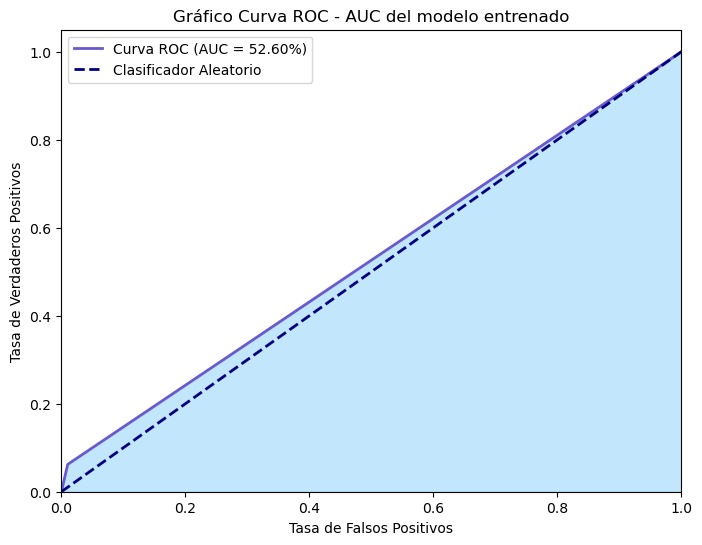

In [18]:
# Imprimir el grafico curva roc - auc

fpr, tpr, thresholds = roc_curve(y_test, prediccion)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='slateblue', lw=2, label=f'Curva ROC (AUC = {roc_auc*100:.2f}%)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, label=f'Clasificador Aleatorio', linestyle='--')
plt.fill_between(fpr, tpr, color='lightskyblue', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Gráfico Curva ROC - AUC del modelo entrenado')
plt.legend(loc='upper left')
plt.show()